In [5]:
import pandas as pd
entidade = pd.read_csv('sample_data/vendas.csv', sep=';') #enconding=‘encode’
display(entidade) # display só existe no Jupyter



,Preco,TipoBem,TipoVenda,Ano,Comprimento,Largura,Material
0,1256,4,1,2003,4,3,12
1,1182,2,5,2013,1,4,10
2,1524,1,4,2004,4,4,9
3,4515,4,5,2003,3,3,2
4,6603,2,5,2011,3,4,12
...,...,...,...,...,...,...,...
2995,7719,1,4,2001,3,4,6
2996,8563,1,5,2020,3,4,12
2997,1206,2,5,2021,4,5,11
2998,3587,4,5,2005,3,5,9


Preco          3000
TipoBem        3000
TipoVenda      3000
Ano            3000
Comprimento    3000
Largura        3000
Material       3000
dtype: int64

In [6]:
print(entidade.info())
#entidade.head()/tail(); entidade.describe(), entidade.dtypes; entidade.count();
# entidade[atributo].método - entidade[atributo].value_counts();
#%matplotlib inline
# entidade[atributo].método - entidade[atributo].value_counts().plot.bar()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Preco        3000 non-null   int64
 1   TipoBem      3000 non-null   int64
 2   TipoVenda    3000 non-null   int64
 3   Ano          3000 non-null   int64
 4   Comprimento  3000 non-null   int64
 5   Largura      3000 non-null   int64
 6   Material     3000 non-null   int64
dtypes: int64(7)
memory usage: 164.2 KB
None


,Preco
Preco,1.000000
TipoBem,-0.006370
TipoVenda,0.009657
Ano,-0.001970
Comprimento,0.041315
Largura,0.028781
Material,0.022890


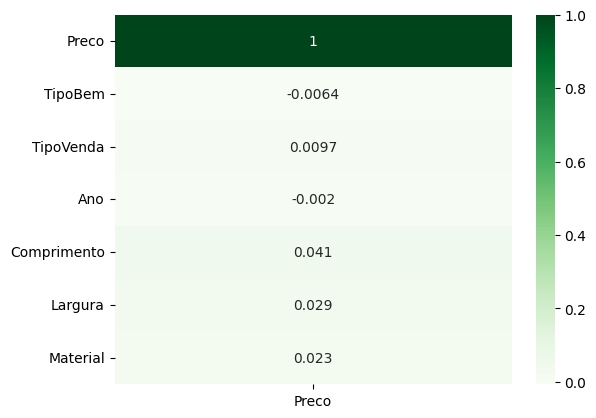

In [12]:
# display(entidade.corr())
#correlacao = entidade.corr() # A AI, fará outros cruzamentos entre as variávies
#display(correlacao)

correlacao2 = entidade.corr()[['Preco']] # Filtrar por atributo
display(correlacao2[['Preco']])

import seaborn as sns # (3 - Continuação)
import matplotlib.pyplot as plt

# Criar o Gráfico
sns.heatmap(correlacao2, cmap='Greens', annot=True) # criar o gráfico

# Exibir o Gráfico
plt.show()

In [14]:
# 4. Modelagem/Algoritmo = (IA, se necessário) -  dividir a base em Y e X
# Preparando a base de dados para o aprendizado da IA
# Previsões (probabilidades)

y = entidade['Preco']   # IA = aprender/decorar;

# axis = 0 , linhas e axis = 1, colunas
# x = entidade[‘atributo 1’, ‘atributo 2’, ‘atributo 3’, ‘atributo 4’] 
x = entidade.drop('Preco', axis=1) # axis = 1 (coluna)

from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1) # 70% foi para treino; random_state=1 (na prática não precisa para não fixar a base treino – é didático)

In [17]:
from sklearn.linear_model import LinearRegression # NeuralNetwork
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

In [18]:
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

In [20]:
from sklearn.metrics import r2_score

previsao_regressaolinear = modelo_regressaolinear.predict(x_teste) # previsão
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste) # previsão

print(r2_score(y_teste, previsao_regressaolinear)) # previsão regressão linear
print(r2_score(y_teste, previsao_arvoredecisao)) # previsão árvore de decisão

-0.005419906938279873
-0.10854825890942932


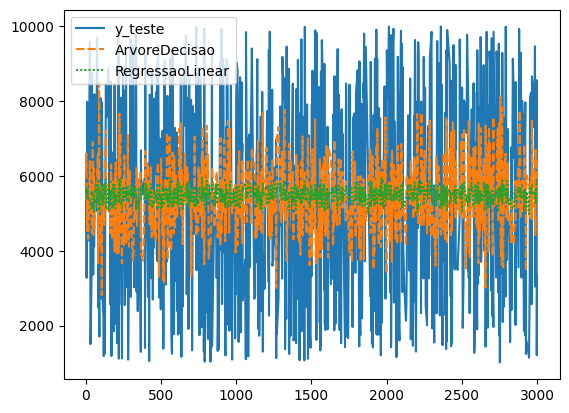

In [21]:
entidade_aux = pd.DataFrame() # entidade vazia
entidade_aux['y_teste'] = y_teste
entidade_aux['ArvoreDecisao'] = previsao_arvoredecisao
entidade_aux['RegressaoLinear'] = previsao_regressaolinear

sns.lineplot(data=entidade_aux) # gráfico de linha
plt.show()


In [23]:
entidade_nova = pd.read_csv('sample_data/vendasNovo.csv', sep=';')
display(entidade_nova)

# Fazendo Previsões com base na aprendizagem do modelo
previsao = modelo_regressaolinear.predict(entidade_nova)
print(previsao)


,TipoBem,TipoVenda,Ano,Comprimento,Largura,Material
0,4,1,2007,3,4,3
1,3,1,2012,5,2,10
2,2,3,2007,4,1,2
3,2,4,2019,2,2,11
4,1,4,2007,2,3,7
5,3,5,2010,3,1,11
6,4,5,2019,4,2,2
7,3,3,2014,5,3,12
8,4,2,2014,1,3,11


[5461.84317672 5640.59174674 5306.10033975 5437.43515719 5406.45681047
 5434.94960951 5443.87254832 5795.77568015 5391.4326803 ]
